### KMeans Clustering for Customer Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mall_customer.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Data Visualization

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


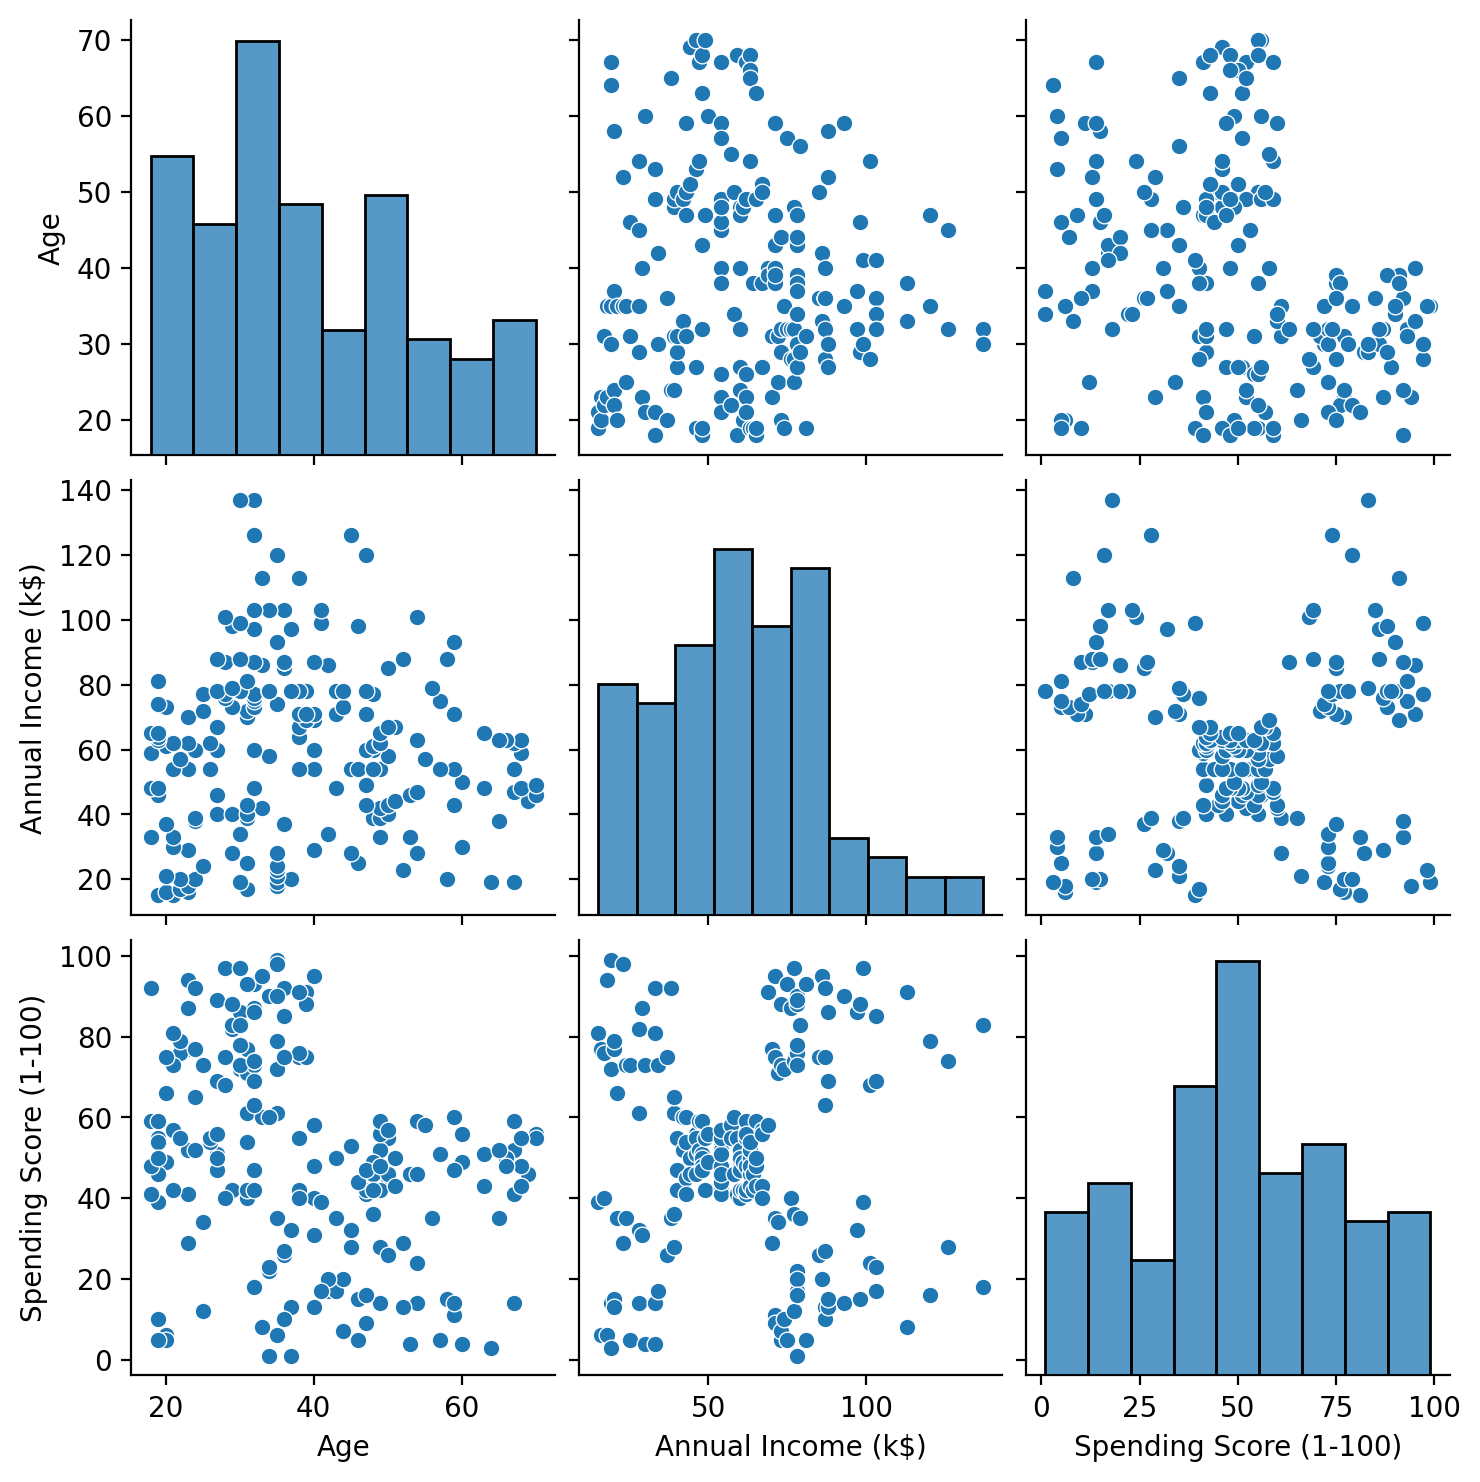

In [10]:
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['figure.dpi'] = 200
sns.pairplot(df.iloc[:, 2:])

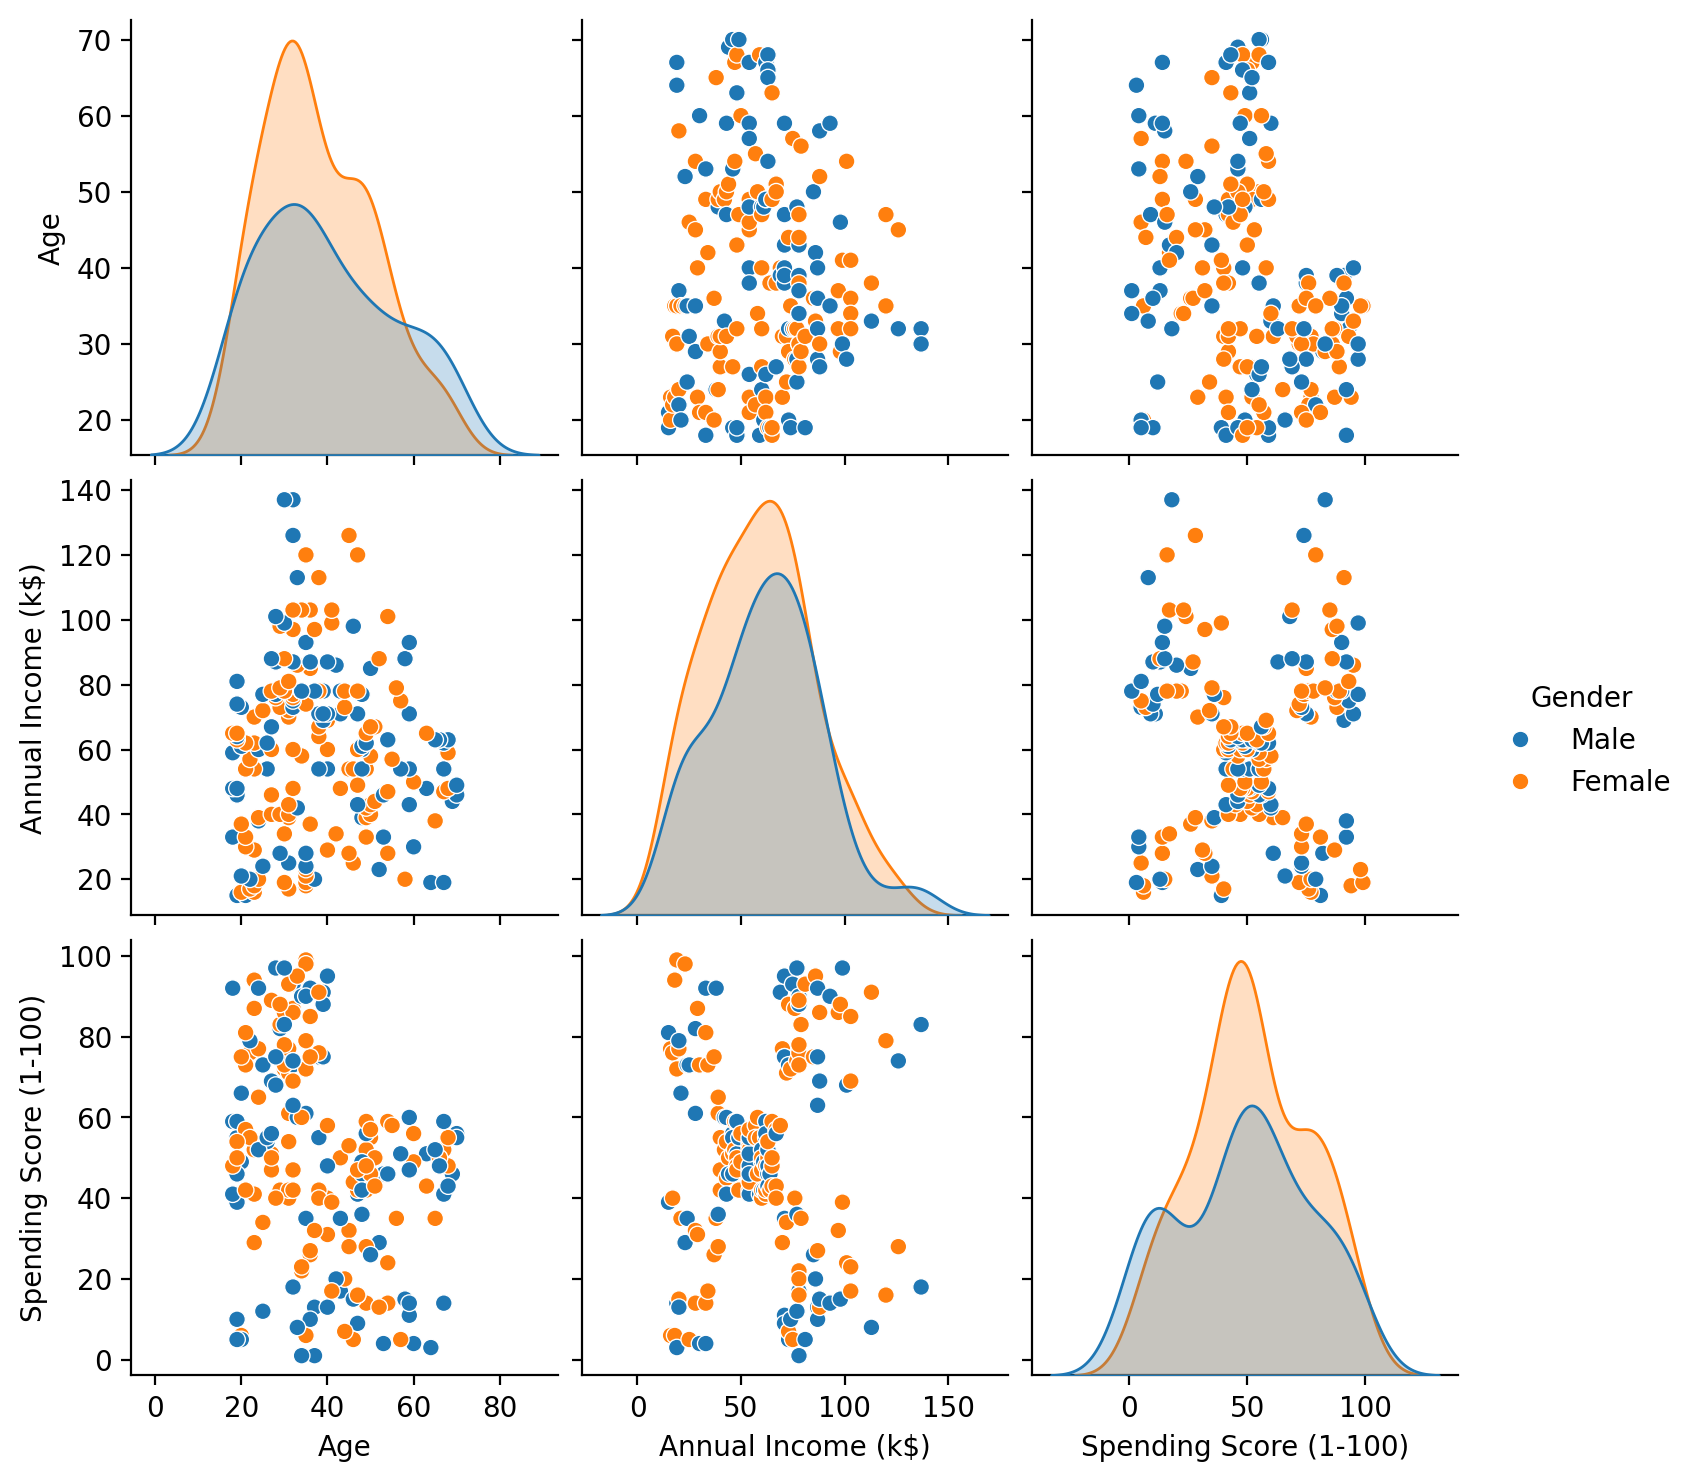

In [11]:
sns.pairplot(df.iloc[:, 1:], hue='Gender')

<Axes: xlabel='count', ylabel='Gender'>

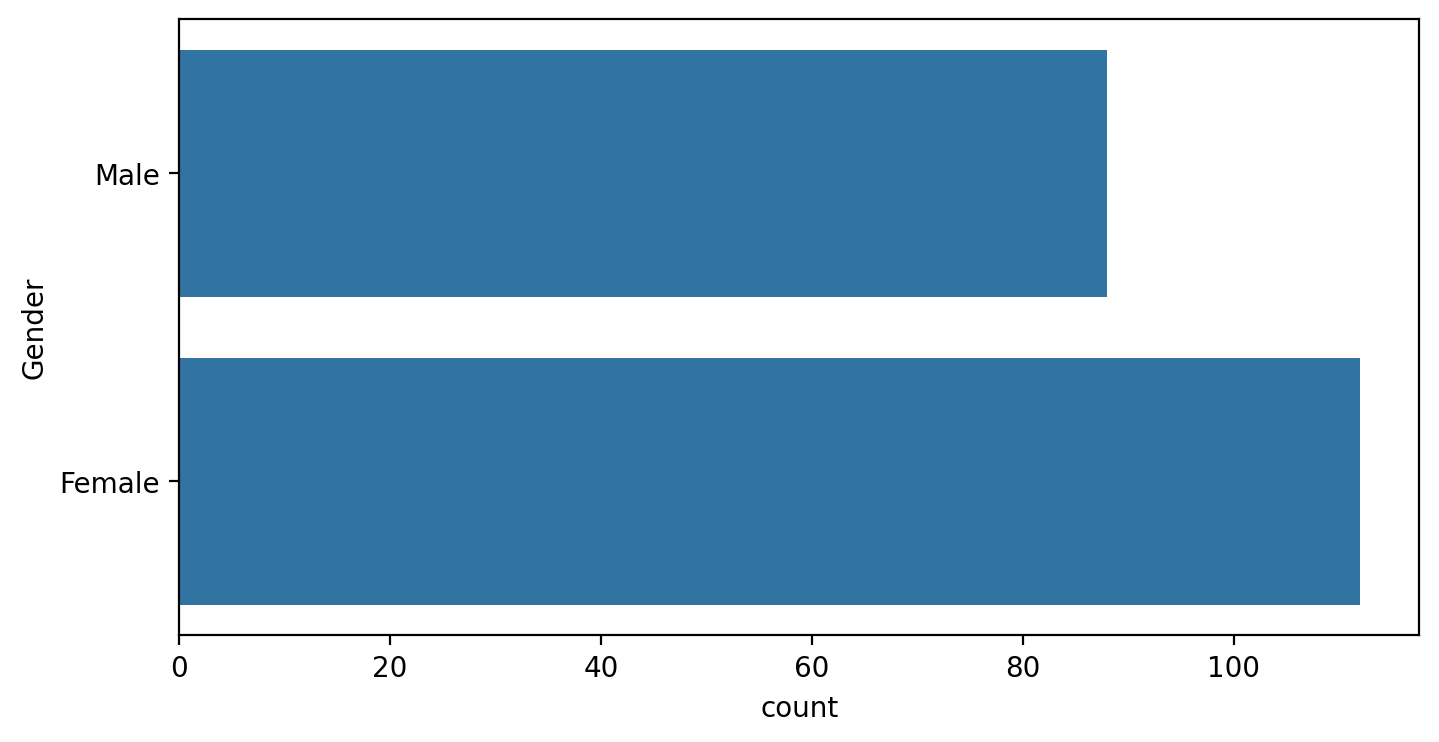

In [18]:
sns.countplot(df['Gender'])

### Standardization

In [20]:
from sklearn.preprocessing import StandardScaler


In [23]:
X = df.iloc[:, 2:]
scaler = StandardScaler()
X = scaler.fit_transform(X)

pd.DataFrame(X, columns=['Age', 'Income', 'Score'])

,Age,Income,Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [24]:
gender = df['Gender']
df = pd.DataFrame(X, columns=['Age', 'Income', 'Score'])
df['Gender'] = gender 

In [25]:
df

,Age,Income,Score,Gender
0,-1.424569,-1.738999,-0.434801,Male
1,-1.281035,-1.738999,1.195704,Male
2,-1.352802,-1.700830,-1.715913,Female
3,-1.137502,-1.700830,1.040418,Female
4,-0.563369,-1.662660,-0.395980,Female
...,...,...,...,...
195,-0.276302,2.268791,1.118061,Female
196,0.441365,2.497807,-0.861839,Female
197,-0.491602,2.497807,0.923953,Male
198,-0.491602,2.917671,-1.250054,Male


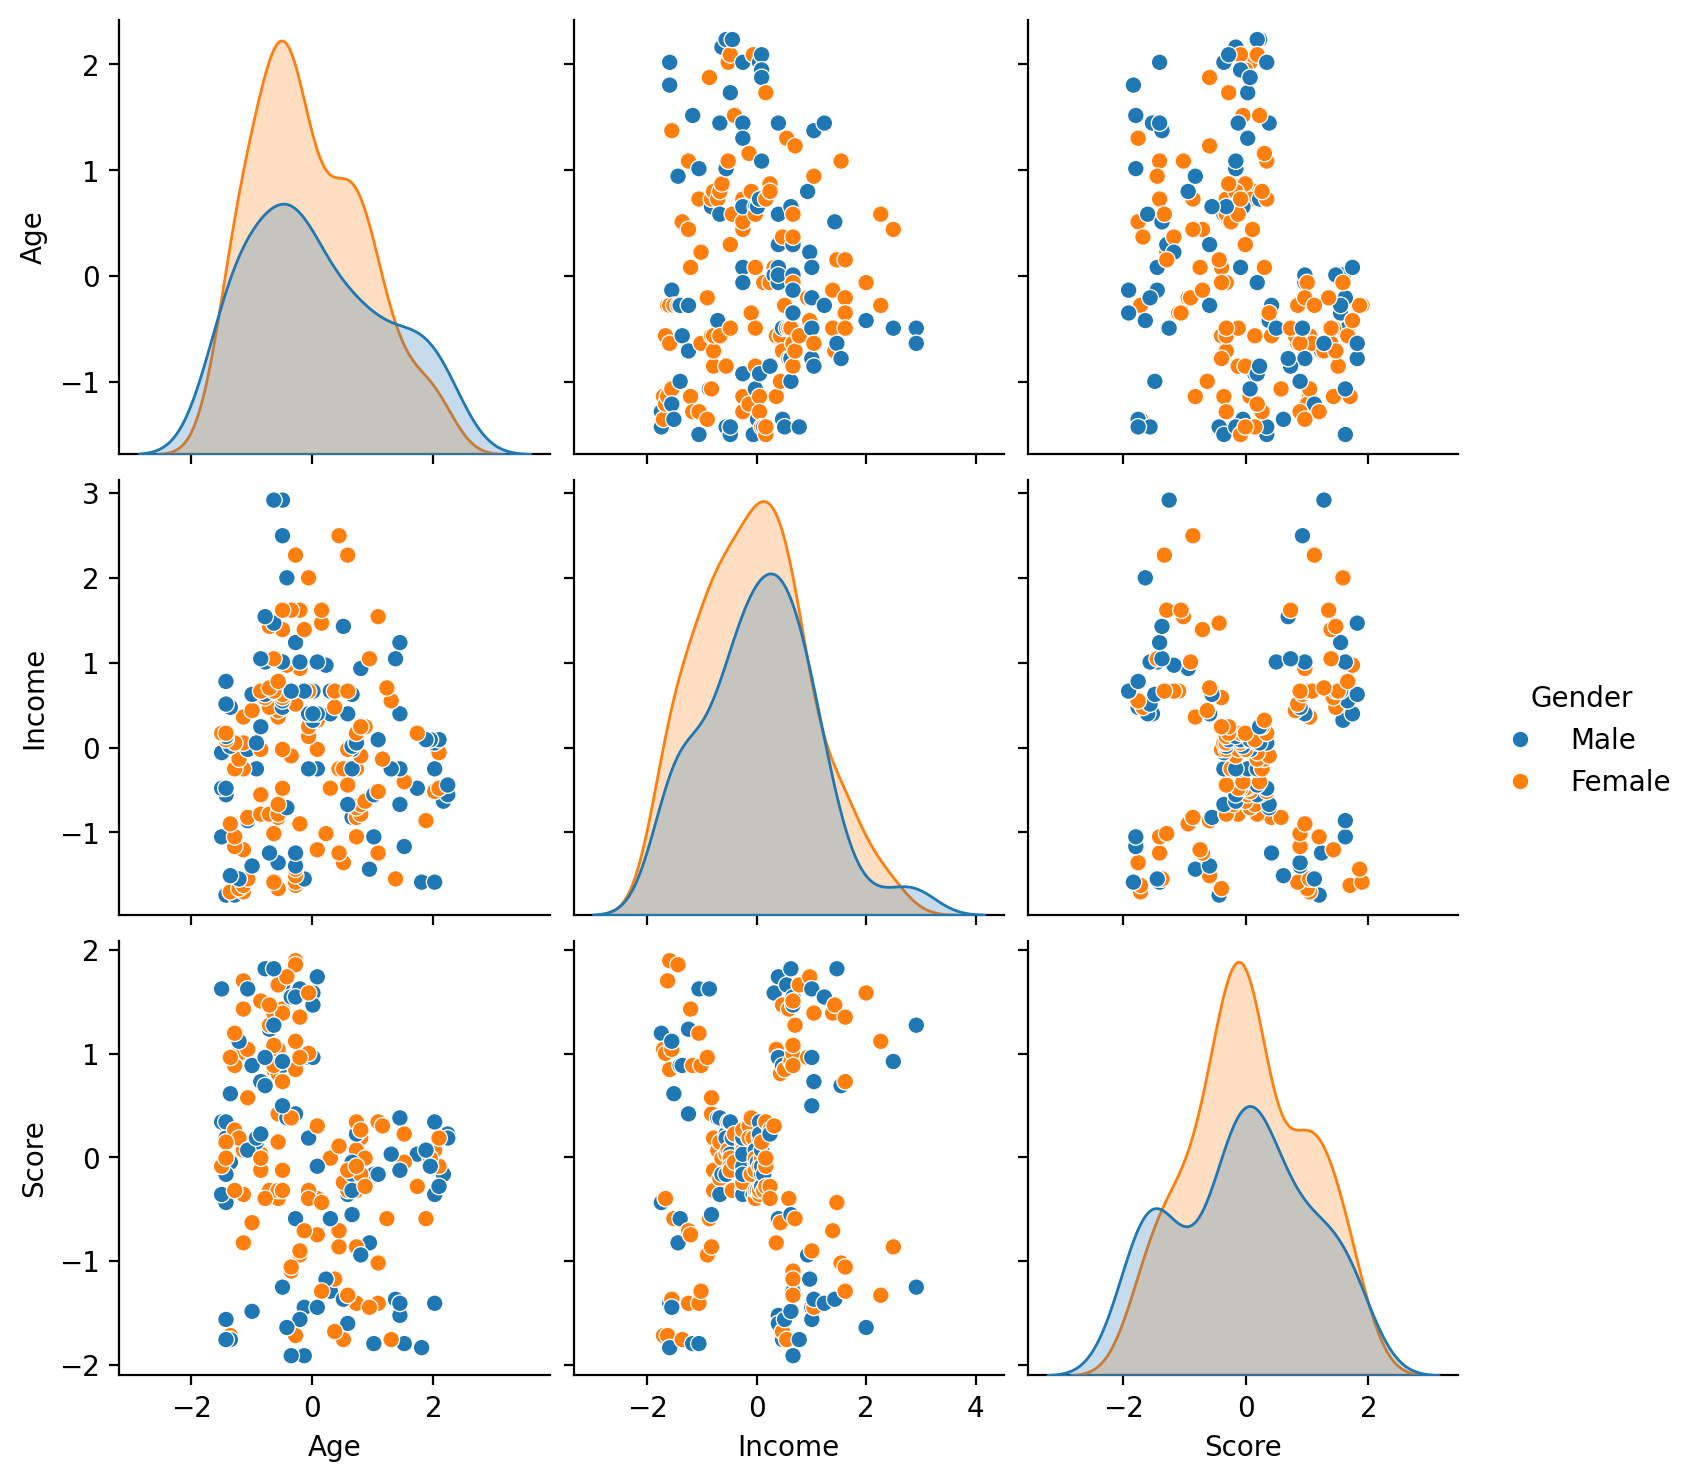

In [26]:
sns.pairplot(df, hue='Gender')

### Segmentation with Age vs Spending Score

In [27]:
df.head()

,Age,Income,Score,Gender
0,-1.424569,-1.738999,-0.434801,Male
1,-1.281035,-1.738999,1.195704,Male
2,-1.352802,-1.700830,-1.715913,Female
3,-1.137502,-1.700830,1.040418,Female
4,-0.563369,-1.662660,-0.395980,Female


<Axes: xlabel='Age', ylabel='Score'>

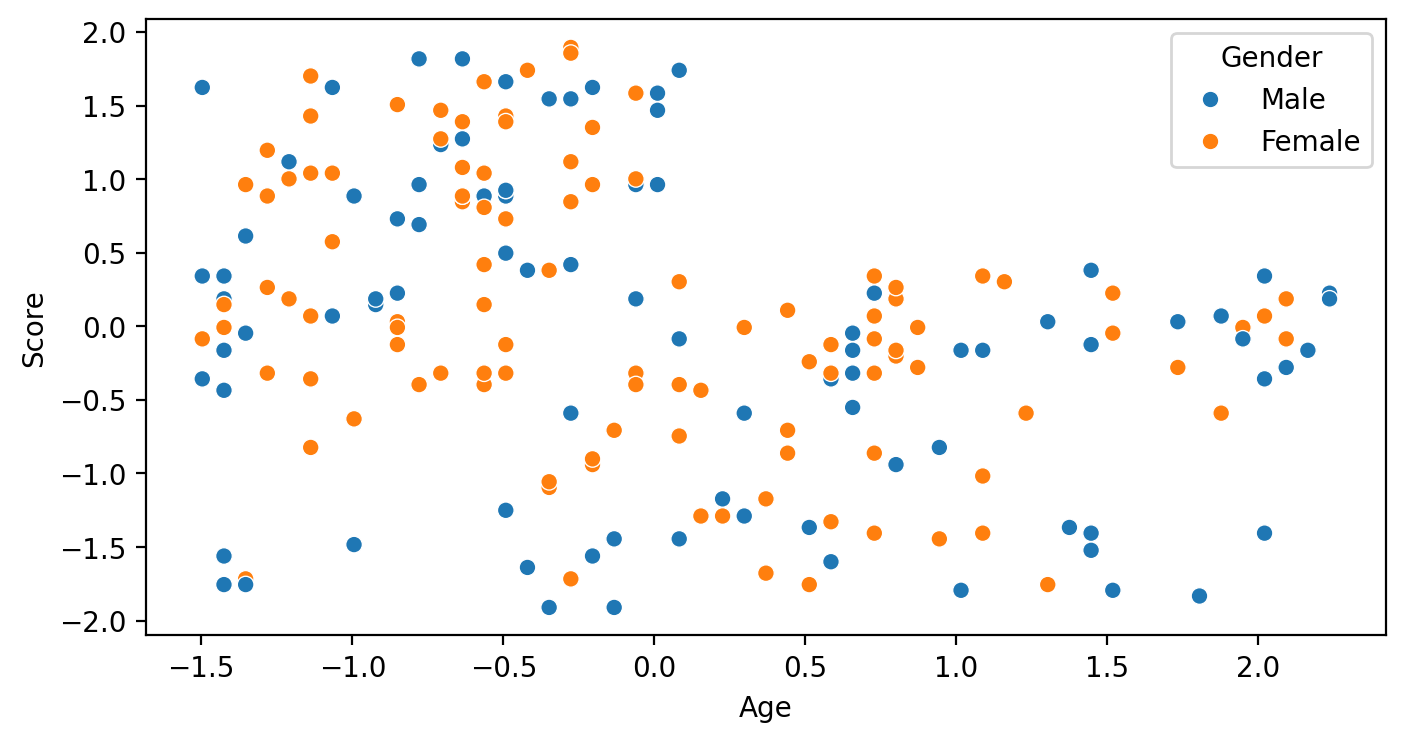

In [28]:
sns.scatterplot(data=df, x='Age', y='Score', hue='Gender')

In [29]:
columns = list(df.columns)
columns

['Age', 'Income', 'Score', 'Gender']

In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)

X = df[['Age', 'Score']].to_numpy()
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

In [31]:
kmeans.labels_

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [32]:
labels = kmeans.labels_
kmeans.cluster_centers_

array([[ 0.70892251, -0.69939115],
       [-0.75277339,  0.74265245]])

In [33]:
kmeans.inertia_

189.38749033992428

### Clusters Visualization

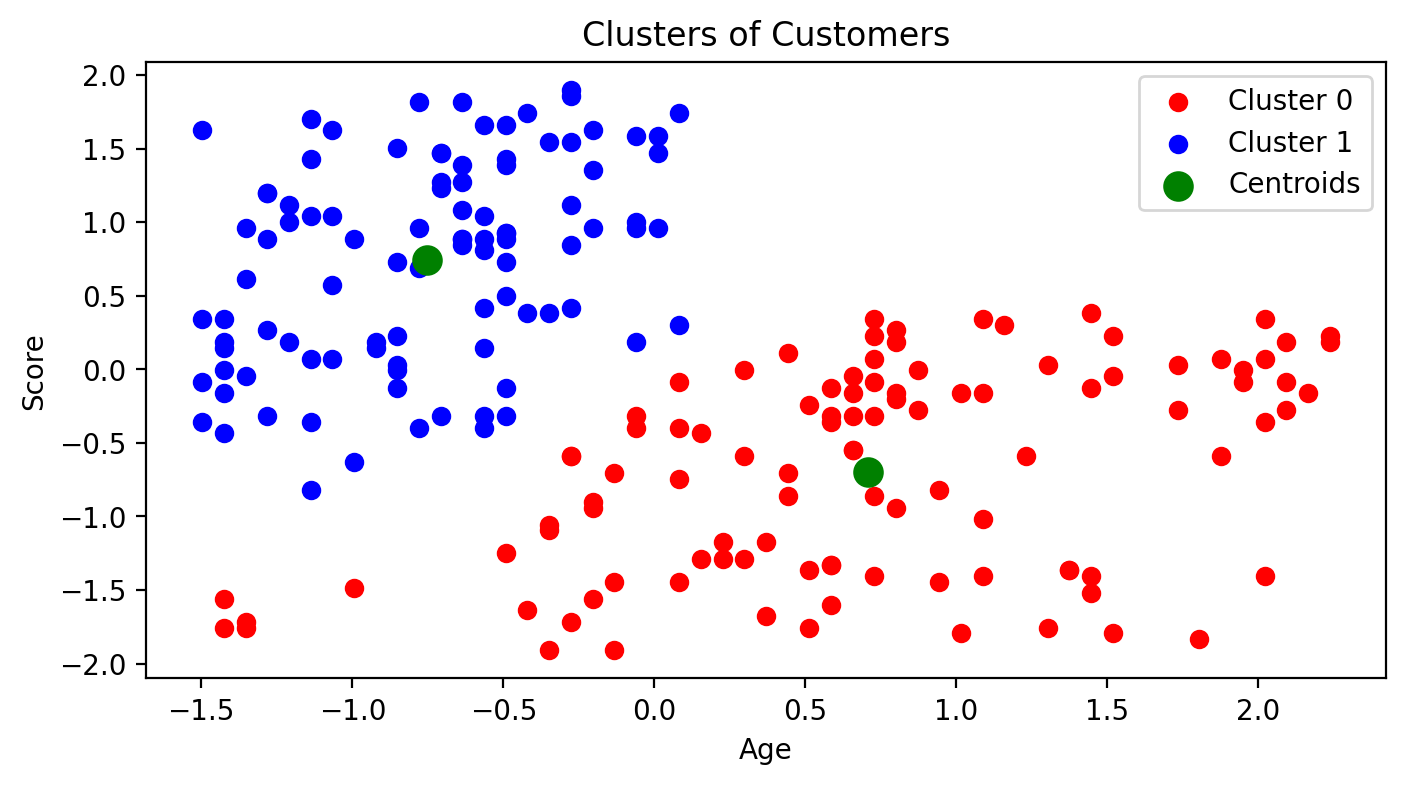

In [44]:
clust0 = labels == 0
clust1 = labels == 1

plt.scatter(X[clust0,0],X[clust0, 1], c='r', label='Cluster 0')
plt.scatter(X[clust1,0],X[clust1, 1], c='b', label='Cluster 1')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='g', label='Centroids', s=100)
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Score')
plt.legend()
plt.show()

### Decision Boundary Visualization

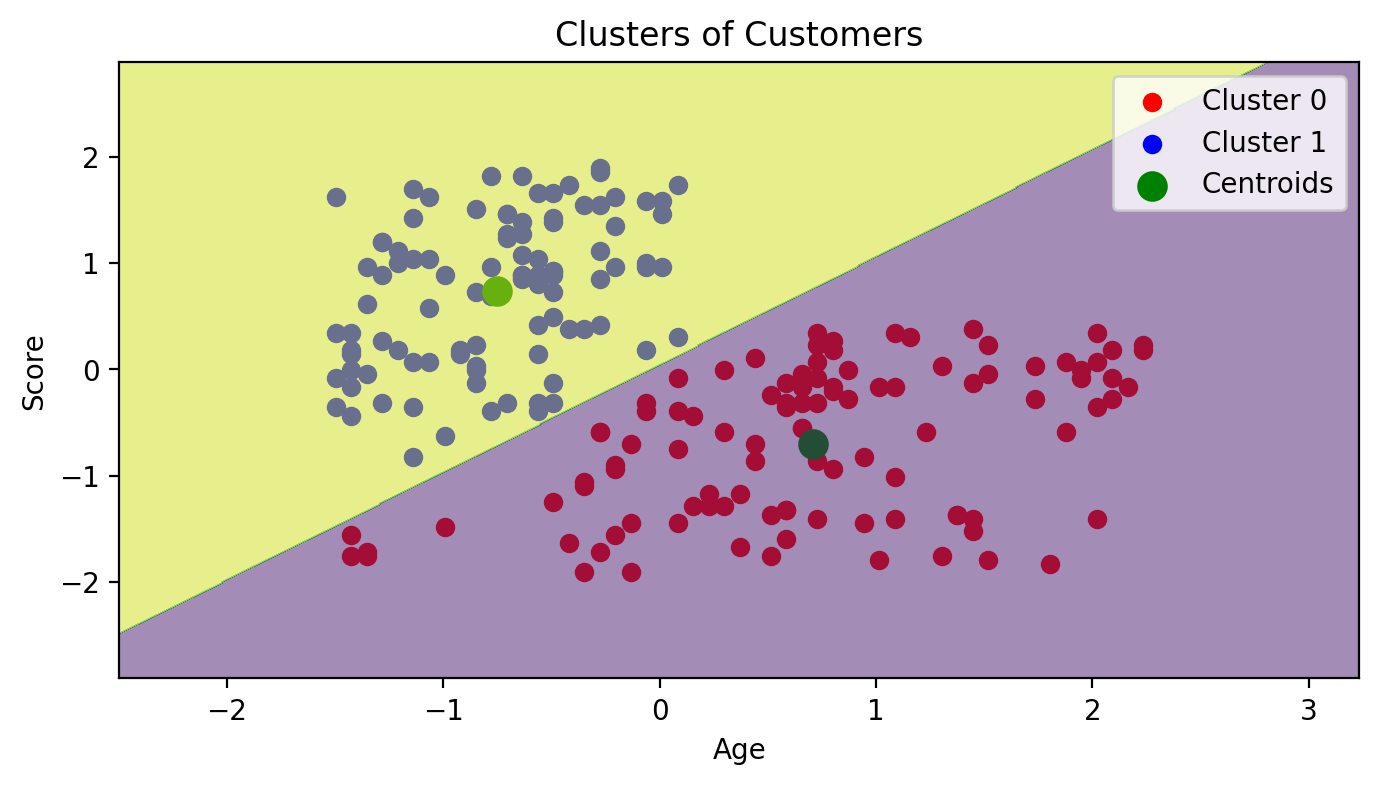

In [45]:
clust0 = labels == 0
clust1 = labels == 1

plt.scatter(X[clust0,0],X[clust0, 1], c='r', label='Cluster 0')
plt.scatter(X[clust1,0],X[clust1, 1], c='b', label='Cluster 1')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='g', label='Centroids', s=100)
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Score')
plt.legend()

x_min = X[:, 0].min()-1
x_max = X[:, 0].max()+1

y_min = X[:, 1].min()-1
y_max = X[:, 1].max()+1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

region_points = np.concatenate([xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)], axis=1)

Z = kmeans.predict(region_points)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.5)


### Putting Everything Together

Cluster 0: 23 points
Cluster 1: 37 points
Cluster 2: 57 points
Cluster 3: 19 points
Cluster 4: 26 points
Cluster 5: 38 points


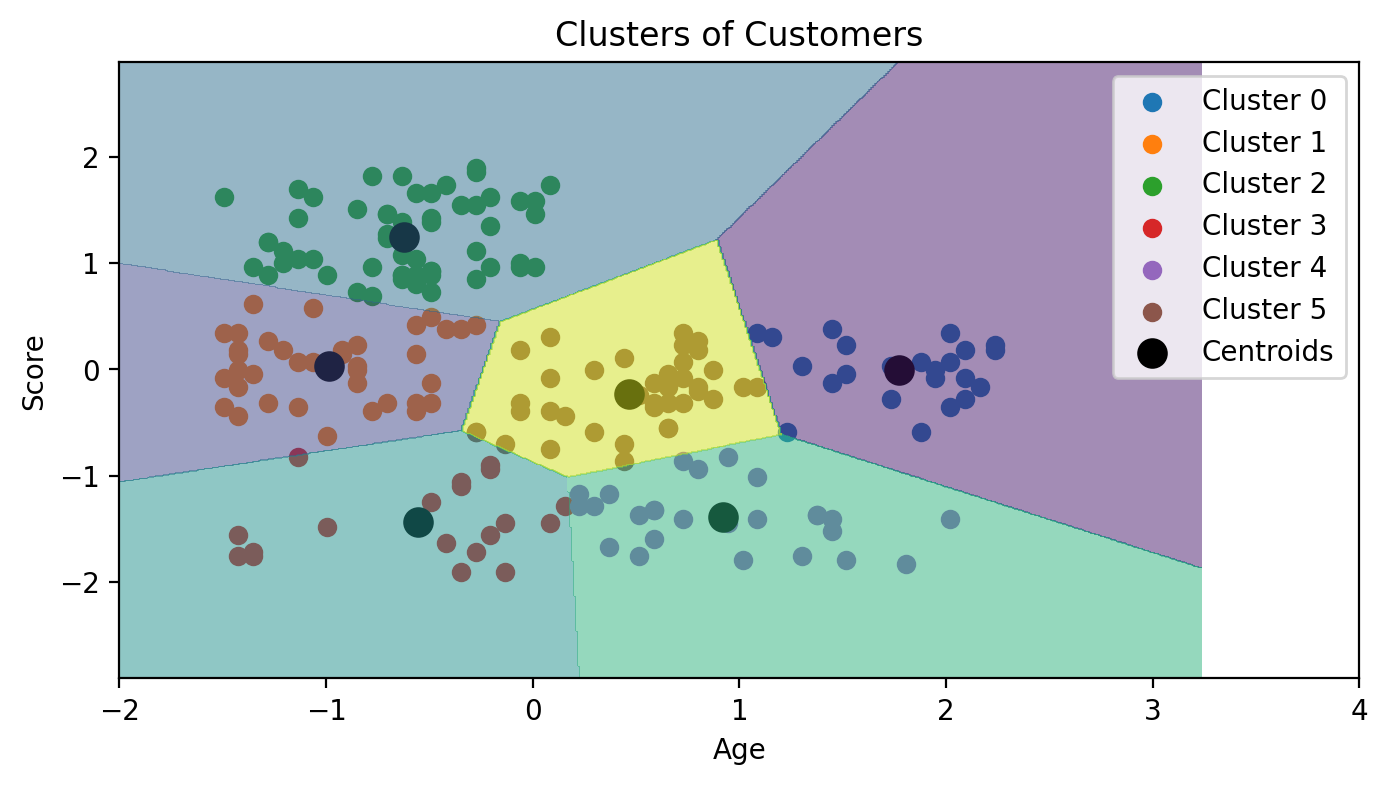

In [59]:
k=6
kmeans = KMeans(n_clusters=k)

X = df[['Age', 'Score']].to_numpy()
kmeans.fit(X)

labels = kmeans.labels_
kmeans.cluster_centers_
kmeans.inertia_

for idx in range(k):
    clusti = labels == idx
    print(f"Cluster {idx}: {clusti.sum()} points")
    plt.scatter(X[clusti,0],X[clusti, 1], label=f'Cluster {idx}')
    

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='k', label='Centroids', s=100)
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Score')
plt.legend()

plt.xlim(-2, 4)

## Decision Boundary
x_min = X[:, 0].min()-1
x_max = X[:, 0].max()+1

y_min = X[:, 1].min()-1
y_max = X[:, 1].max()+1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

region_points = np.concatenate([xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)], axis=1)

Z = kmeans.predict(region_points)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.5)

### Optimal Number of Clusters

### Elbow Method & Silhouette Method

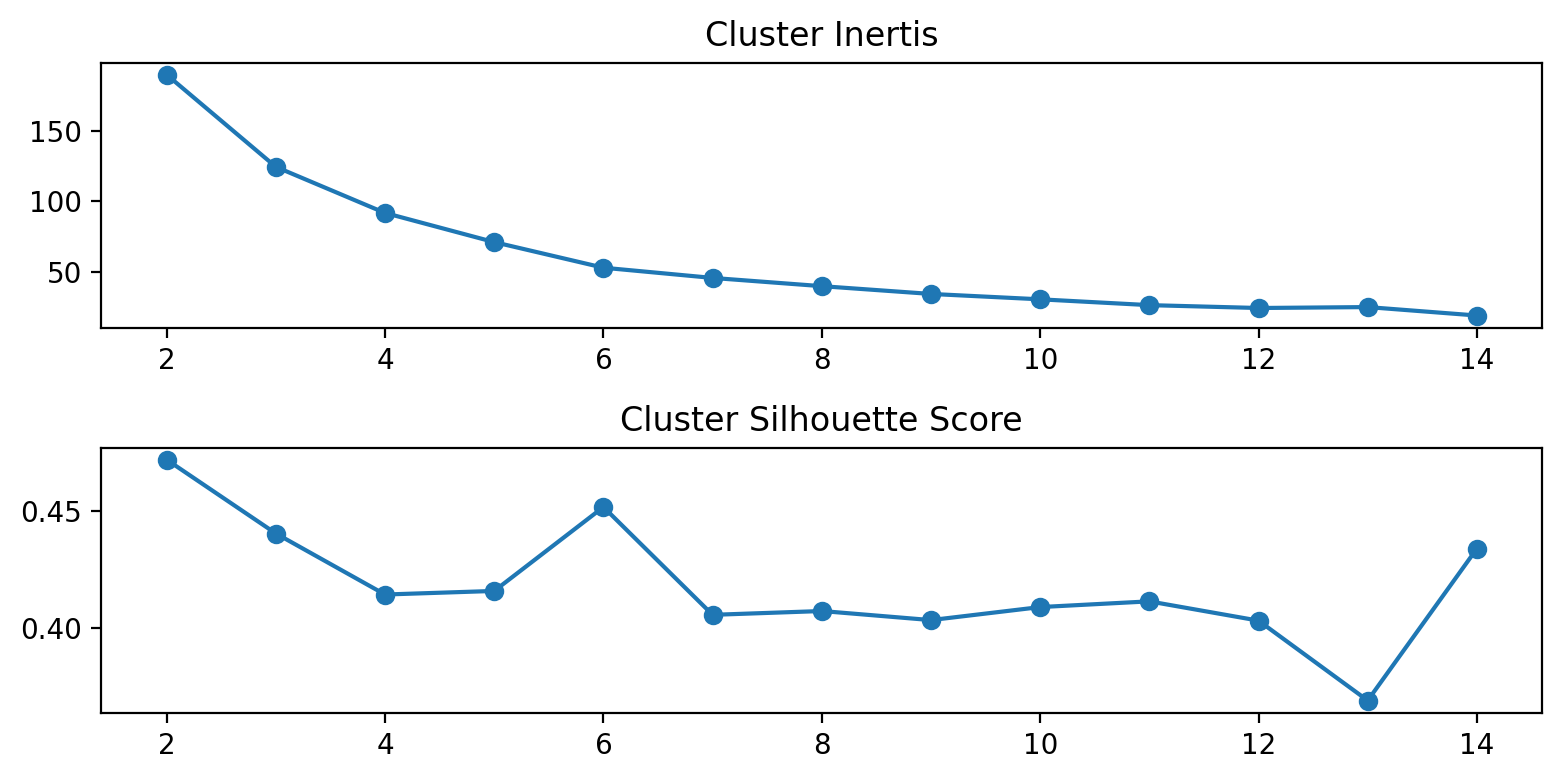

In [58]:
from sklearn.metrics import silhouette_score
inertia = []
sil_score = []

max_k = 15
for k in range(2, max_k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

    cluster_labels = kmeans.labels_

    sil_score.append(silhouette_score(X, cluster_labels))

plt.subplot(2,1,1)
plt.plot(np.arange(2, max_k), inertia, 'o-')
plt.title('Cluster Inertis')

plt.subplot(2,1,2)
plt.plot(np.arange(2, max_k), sil_score, 'o-')
plt.title('Cluster Silhouette Score')

plt.tight_layout()